# Import Libraries

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [16]:
#Load the dataset
data = pd.read_csv('C:\\Users\\Admin\\Desktop\\Capstone Project\\data.csv')

#Display the first few rows of the dataset
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Upon intial inspection we can see an id column which wont be useful for our models and 'Unnamed:32' column full of NaNs which we can eliminate.

# Check for missing values

In [17]:
#Check for missing values in the dataset
missing_values = data.isnull().sum()

missing_values


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Since column 32 is only Nan values we can remove it and check the distribution of 'diagnosis' column.

In [18]:
#Drop the 'Unnamed: 32' column
data.drop(columns=['Unnamed: 32', 'id'], inplace=True)

data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Checking data distribution

In [19]:
#Check the distribution of values in the 'diagnosis' column
diagnosis_distribution = data['diagnosis'].value_counts()

diagnosis_distribution

B    357
M    212
Name: diagnosis, dtype: int64

No data imbalance is observed as the number of benign tumors does not far outweight the maligant tumors.

## Exploratory Data Analysis

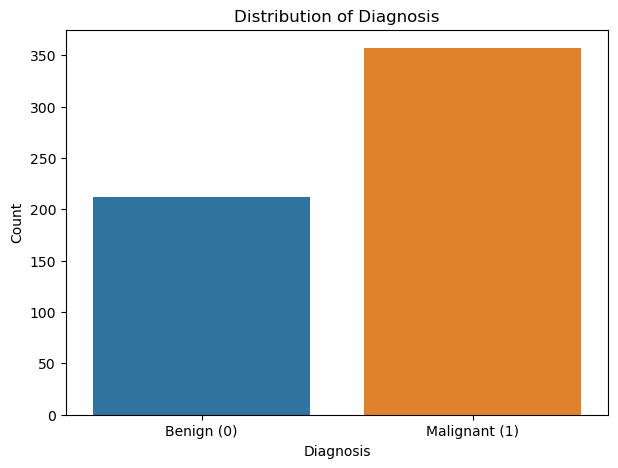

In [20]:
#Plot the distribution of the target variable 'diagnosis' again
plt.figure(figsize=(7, 5))
sns.countplot(x='diagnosis', data=data)
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(ticks=[0,1], labels=['Benign (0)', 'Malignant (1)'])
plt.show()

#The dataset does not seem to be imbalanced

C:\Users\Admin\AppData\Local\Temp\ipykernel_22148\3656682626.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


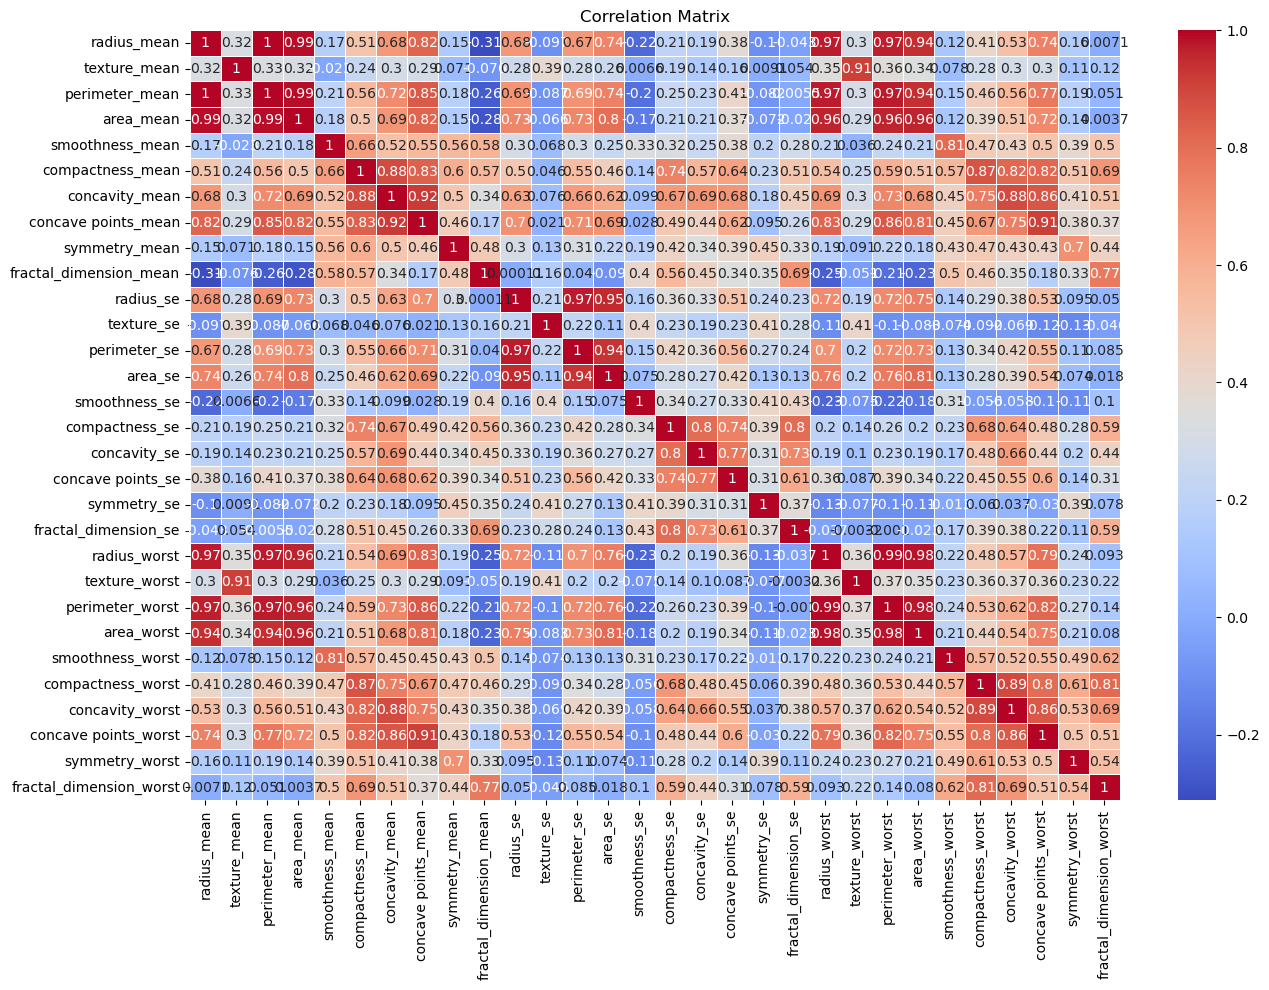

In [21]:
#Compute the correlation matrix
correlation_matrix = data.corr()

#Plot the heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Many features are strongly positively correlated with each other. For instance, radius_mean, perimeter_mean, and area_mean have high correlations, which makes sense since the perimeter and area are derived from the radius.
The target variable, diagnosis, also has strong correlations with several features. This indicates that these features are influential in determining whether a tumor is benign or malignant.
Some features, like fractal_dimension_mean, have weaker correlations with the diagnosis. Some potential feature reduction might be needed for certain models.

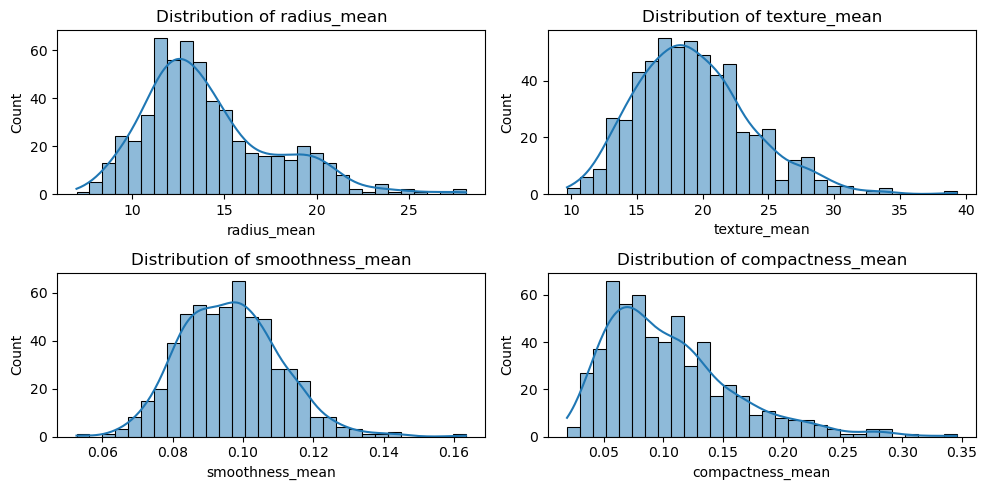

In [22]:
#Plot histograms for some selected features to analyze distribution
selected_features = ['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean']

plt.figure(figsize=(10, 5))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

Radius_mean: The distribution appears to be slightly right-skewed, with most
tumors having a mean radius around 10 to 15.
Texture_mean: The distribution is fairly normal, with a peak around 20.
Smoothness_mean: The distribution is slightly left-skewed, with most tumors having a mean smoothness value around 0.1.
Compactness_mean: The distribution is right-skewed, indicating that most tumors have a lower mean compactness value.

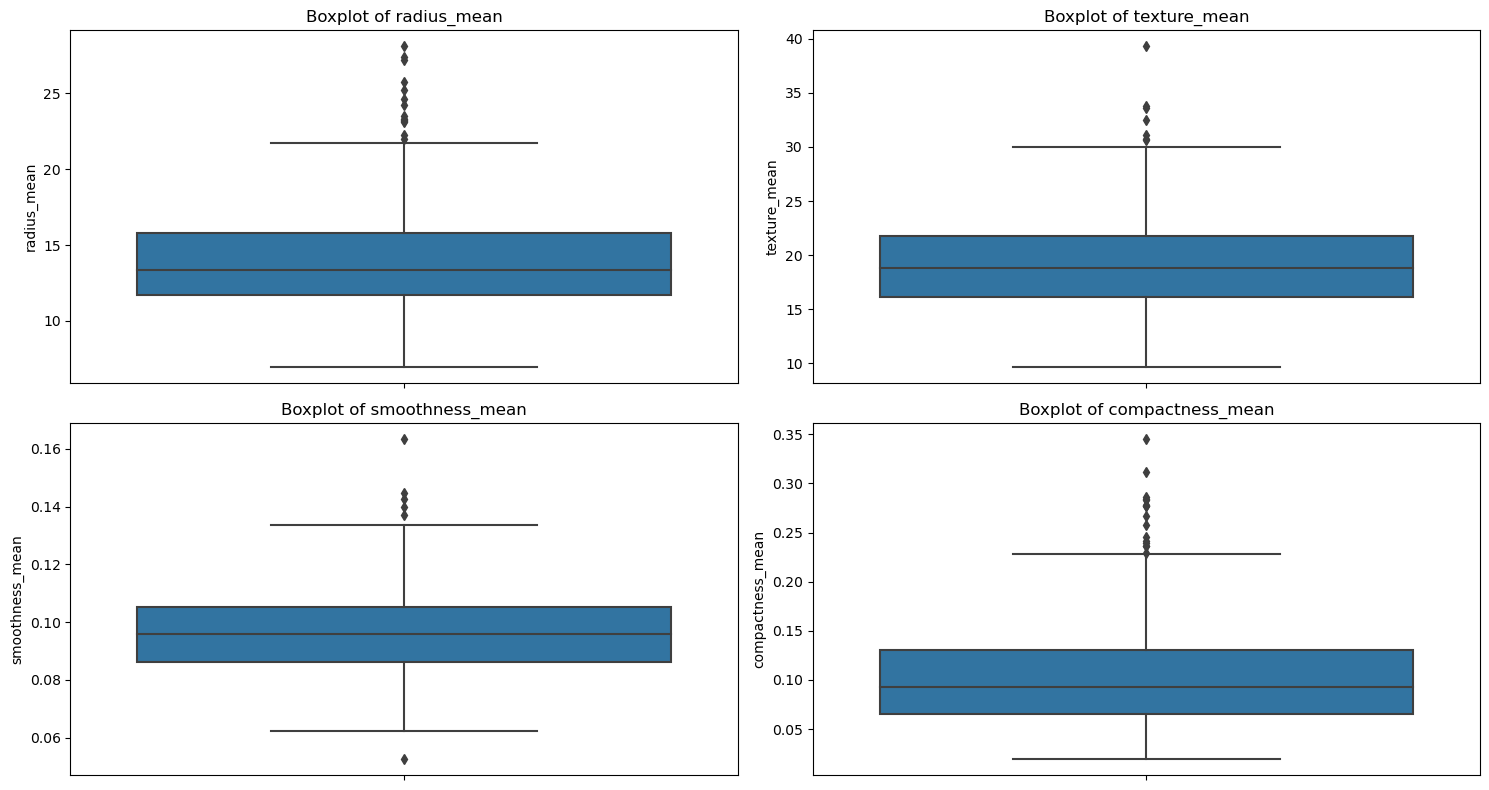

In [23]:
#Plot boxplots for the selected features
plt.figure(figsize=(15, 8))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

Outliers are present but this is expected as these outliers values are based on measurements which are in line with malignant tumor cells.

## Data Pre-processing

Inspect columns for any potential anomalies

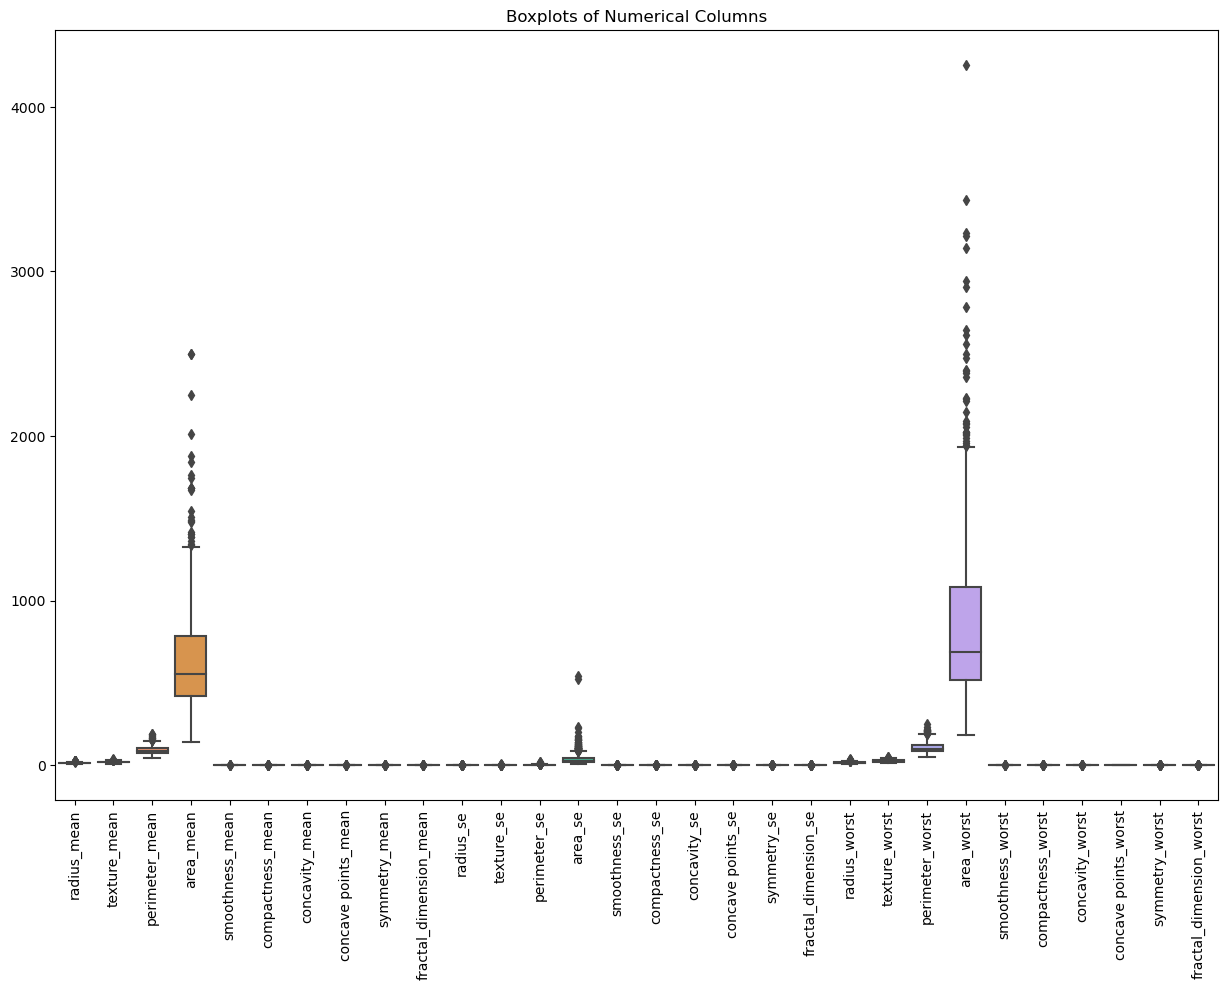

In [24]:
#Extract numerical columns
numerical_columns = data.select_dtypes(include=['float64']).columns

#Plot boxplots for numerical columns
plt.figure(figsize=(15, 10))
sns.boxplot(data=data[numerical_columns])
plt.xticks(rotation=90)
plt.title("Boxplots of Numerical Columns")
plt.show()


I have decide to drop the area_worst column as it simply outputs the largest average of the mean and standard error of tumor features which is not very tumor specific. The area_mean column will not be removed as a common feature of malignant tumors is a larger size, therefore we expect there to be outliers.

In [25]:
#Drop the 'area_worst' column
data.drop(columns=['area_worst'], inplace=True)

#Display the first few rows of the dataset after dropping the column
data.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,0.006193,25.38,17.33,184.60,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.003532,24.99,23.41,158.80,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.004571,23.57,25.53,152.50,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.009208,14.91,26.50,98.87,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.005115,22.54,16.67,152.20,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Normalizing Data

In [26]:
#Initialize the MinMaxScaler
scaler = MinMaxScaler()

#Exclude non-numerical columns: 'id' and 'diagnosis'
columns_to_normalize = data.columns.difference(['id', 'diagnosis'])

#Apply the scaler to the data
data_normalized = data.copy()
data_normalized[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

#Display the first few rows of the normalized dataset
data_normalized.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.183042,0.620776,0.141525,0.668310,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,M,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.091110,0.606901,0.303571,0.539818,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,M,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.127006,0.556386,0.360075,0.508442,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,M,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.287205,0.248310,0.385928,0.241347,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,M,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.145800,0.519744,0.123934,0.506948,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


I have decided to normalize the data since I am working with regularized models, therefore gradient descent-based optimization and network convergence can perform better.

# Label Encoding

In [27]:
#Encode the 'diagnosis' column
data_normalized['diagnosis'] = data_normalized['diagnosis'].map({'B': 0, 'M': 1})

#Display the first few rows of the original dataset after encoding
data_normalized.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.183042,0.620776,0.141525,0.668310,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.091110,0.606901,0.303571,0.539818,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.127006,0.556386,0.360075,0.508442,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.287205,0.248310,0.385928,0.241347,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.145800,0.519744,0.123934,0.506948,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


For ML algorithms categorical target features should be enconded. In this case "diagnosis" has categorical values ("B" for Benign and "M" for Malignant). These can be encoded into binary values.

# Feature Selection

In [28]:
#Using RFE to rank all features
features = data_normalized.columns.drop(['diagnosis'])
model = LogisticRegression(max_iter=10000)
rfe_all = RFE(estimator=model, n_features_to_select=1)
rfe_all.fit(data[features], data_normalized['diagnosis'])

#Getting the ranking of the features
feature_ranking = pd.Series(rfe_all.ranking_, index=features).sort_values()

feature_ranking


concavity_worst             1
compactness_worst           2
texture_se                  3
radius_worst                4
radius_mean                 5
concave points_worst        6
symmetry_worst              7
concavity_mean              8
compactness_mean            9
smoothness_worst           10
perimeter_se               11
concave points_mean        12
symmetry_mean              13
texture_worst              14
smoothness_mean            15
texture_mean               16
perimeter_worst            17
area_se                    18
fractal_dimension_worst    19
compactness_se             20
radius_se                  21
perimeter_mean             22
symmetry_se                23
concave points_se          24
fractal_dimension_mean     25
concavity_se               26
smoothness_se              27
fractal_dimension_se       28
area_mean                  29
dtype: int32

The rank '1' indicates the most important feature, and higher numbers correspond to decreasing importance.

# Accuracy for subset of features

In [29]:
#Splitting the dataset into training and validation sets
fe_X_train, fe_X_val, fe_y_train, fe_y_val = train_test_split(data_normalized[features], data['diagnosis'], test_size=0.3, random_state=42)

#Evaluating models with different numbers of top-ranked features
accuracies = {}
for i in range(2, 11):  #From top 2 to top 10 features
    top_features = feature_ranking.index[:i]
    model.fit(fe_X_train[top_features], fe_y_train)
    predictions = model.predict(fe_X_val[top_features])
    accuracy = accuracy_score(fe_y_val, predictions)
    accuracies[i] = accuracy

accuracies


{2: 0.8304093567251462,
 3: 0.8304093567251462,
 4: 0.935672514619883,
 5: 0.935672514619883,
 6: 0.9415204678362573,
 7: 0.9415204678362573,
 8: 0.9415204678362573,
 9: 0.9415204678362573,
 10: 0.9415204678362573}

Looks like the accuracy stops increasing at 6 features therefore, I will use the top 6 features for the linear regression model.

# Build Linear Regression Model

The first thing we need to do is split our data into an x-array (which contains the data that we will use to make predictions) and a y-array (which contains the data that we are trying to predict).

In [30]:
x = data_normalized[['concavity_worst', 'compactness_worst', 'texture_se', 'radius_worst','radius_mean','concave points_worst']]
y = data_normalized['diagnosis']

Splitting Data Set into Training Data and Test Data

In [31]:
#First, split the data into a combined training + validation set (80%) and a test set (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Then, split the training + validation set into separate training (75% of the 80%) and validation sets (25% of the 80%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

Create a model instance & Fit Data

In [32]:
lr_model = LinearRegression()

# it the model with the training data
lr_model.fit(X_train, y_train)

LinearRegression()

Make Prediction

In [33]:
predictions = lr_model.predict(X_test)

# Linear Model Validation

Mean Squared Error

In [34]:
# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, predictions)
mse

0.06201057557577642

In [35]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

# Thresholding the predictions to get class labels
thresholded_predictions = [1 if x >= 0.5 else 0 for x in predictions]

# Calculating the metrics
accuracy = accuracy_score(y_test, thresholded_predictions)
sensitivity = recall_score(y_test, thresholded_predictions)
tn, fp, fn, tp = confusion_matrix(y_test, thresholded_predictions).ravel()
specificity = tn / (tn + fp)
auc = roc_auc_score(y_test, predictions)

print(f"Accuracy: {accuracy:.2%}")
print(f"Sensitivity: {sensitivity:.2%}")
print(f"Specificity: {specificity:.2%}")
print(f"AUC: {auc:.2%}")

Accuracy: 94.74%
Sensitivity: 88.37%
Specificity: 98.59%
AUC: 99.67%


The model performs well with a high accuracy, sensitivity, specificity, and AUC. The AUC value close to 1 indicates that the model has excellent discriminative power between the positive and negative classes.

# Build Random Forest Model

In [45]:
from sklearn.ensemble import RandomForestClassifier
#Create an instance of the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

In [46]:
rf_x= data_normalized.drop(columns=['diagnosis'])
rf_y= data_normalized['diagnosis']

#First, split the data into a combined training + validation set (80%) and a test set (20%)
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(rf_x, rf_y, test_size=0.2, random_state=42)


Determine the optimal number of features

In [47]:
#Train a Random Forest on the full training set to get feature importances
rf_model_full = RandomForestClassifier(random_state=42)
rf_model_full.fit(X_rf_train, y_rf_train)

#Get feature importances and rank the features based on their importance
feature_importances = pd.Series(rf_model_full.feature_importances_, index=features).sort_values(ascending=False)

feature_importances


radius_worst               0.164682
concave points_mean        0.164447
perimeter_worst            0.159806
concave points_worst       0.113353
concavity_mean             0.068216
area_mean                  0.044737
perimeter_mean             0.037091
concavity_worst            0.035086
radius_mean                0.028278
area_se                    0.025360
texture_worst              0.019841
texture_mean               0.016969
radius_se                  0.014028
symmetry_worst             0.011048
compactness_worst          0.009367
smoothness_worst           0.009020
fractal_dimension_worst    0.008684
fractal_dimension_se       0.007883
perimeter_se               0.007041
smoothness_se              0.006667
concavity_se               0.006622
concave points_se          0.006555
compactness_mean           0.006499
fractal_dimension_mean     0.006364
compactness_se             0.005449
smoothness_mean            0.004974
texture_se                 0.004629
symmetry_mean              0

In [48]:
# Evaluating models with different numbers of top-ranked features
rf_accuracies = {}
for i in range(2, 11):  # From top 2 to top 10 features
    top_features = feature_importances.index[:i]
    rf_model_sub = RandomForestClassifier(random_state=42)
    rf_model_sub.fit(X_rf_train[top_features], y_rf_train)
    predictions_sub = rf_model_sub.predict(X_rf_test[top_features])
    accuracy_sub = accuracy_score(y_rf_test, predictions_sub)
    rf_accuracies[i] = accuracy_sub

rf_accuracies


{2: 0.9035087719298246,
 3: 0.9385964912280702,
 4: 0.956140350877193,
 5: 0.956140350877193,
 6: 0.956140350877193,
 7: 0.956140350877193,
 8: 0.9473684210526315,
 9: 0.956140350877193,
 10: 0.956140350877193}

From the results, using the top 9 features provides the highest accuracy of 93.85% on the validation set.

In [49]:
#Define top 9 features
top_9_features = feature_importances.index[:9]


Hyperparamter Tuning: Implementing Random Search

In [50]:
from sklearn.model_selection import RandomizedSearchCV

#Define the parameter distribution
param_dist = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#Set up the Randomized Search with cross-validation
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=50,  #number of parameter settings sampled
                                   cv=3,
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)

#Fit the Randomized Search model
random_search.fit(X_rf_train[top_9_features], y_rf_train)

#Get the best parameters from the Randomized Search
best_random_params = random_search.best_params_

best_random_params


Fitting 3 folds for each of 50 candidates, totalling 150 fits


{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': None}

In [42]:
# Create and train a Random Forest model using the provided parameters
specified_rf_model = RandomForestClassifier(
    n_estimators=150,
    min_samples_split=10,
    min_samples_leaf=2,
    max_features='log2',
    max_depth=30,
    random_state=42
)

specified_rf_model.fit(X_rf_train[top_9_features], y_rf_train)

# Evaluate the model's performance on the test set
specified_predictions = specified_rf_model.predict(X_rf_train[top_9_features])
specified_accuracy = accuracy_score(y_rf_train, specified_predictions)
specified_sensitivity = recall_score(y_rf_train, specified_predictions)
tn_specified, fp_specified, fn_specified, tp_specified = confusion_matrix(y_rf_train, specified_predictions).ravel()
specified_specificity = tn_specified / (tn_specified + fp_specified)
specified_auc = roc_auc_score(y_rf_train, specified_rf_model.predict_proba(X_rf_train[top_9_features])[:, 1])

print(f"Accuracy: {specified_accuracy:.2%}")
print(f"Sensitivity: {specified_sensitivity:.2%}")
print(f"Specificity: {specified_specificity:.2%}")
print(f"AUC: {specified_auc:.2%}")

Accuracy: 97.36%
Sensitivity: 94.67%
Specificity: 98.95%
AUC: 99.79%


In [60]:
import pickle

with open("Predicting_Cancerous_Tumor_Cells_in_Breast_Tissue.pkl", 'wb') as file:
    pickle.dump(specified_rf_model, file)
